<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Crear-el-algoritmo-K-means" data-toc-modified-id="Crear-el-algoritmo-K-means-1">Crear el algoritmo K means</a></span></li><li><span><a href="#Calcular-los-centroides" data-toc-modified-id="Calcular-los-centroides-2">Calcular los centroides</a></span></li><li><span><a href="#Agrupar-nuevos-datos" data-toc-modified-id="Agrupar-nuevos-datos-3">Agrupar nuevos datos</a></span></li><li><span><a href="#Usando-la-libreria-KMeans-de-sklearn" data-toc-modified-id="Usando-la-libreria-KMeans-de-sklearn-4">Usando la libreria KMeans de sklearn</a></span><ul class="toc-item"><li><span><a href="#Calcular-cuantos-clusters-hay" data-toc-modified-id="Calcular-cuantos-clusters-hay-4.1">Calcular cuantos clusters hay</a></span></li></ul></li></ul></div>

# Crear el algoritmo K means

- Choose value for K
- Randomly select K featuresets to start as your centroids
- Calculate distance of all other featuresets to centroids
- Classify other featuresets as same as closest centroid
- Take mean of each class (mean of all featuresets by class), making that mean the new centroid
- Repeat steps 3-5 until optimized (centroids no longer moving)

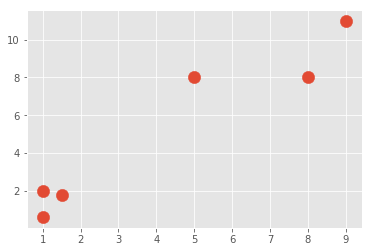

In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

# este tipo de array es como una matriz
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9,11]])

colors = 10*["g","r","c","b","k"]

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [2]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k  # numero de clusters
        self.tol = tol  # tolerancia, si el centroide no se mueve mas
                        # de esta distancia diremos que esta optimizado
        self.max_iter = max_iter  # cuantas iteraciones se haran como maximo
    
    def fit(self,data):

        self.centroids = {}

        # elegimos los 2 primeros valores como centroides
        # TODO podriamos elegirlos al azar mejor, como hemos visto en clase
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        # empezamos a iterar hasta llegar al numero maximo de iteraciones
        # o hasta que este optimizado
        for i in range(self.max_iter):
            self.classifications = {}  # el resultado, es un diccionario que tendra como claves
                                       # los nombres de los grupos, cada grupo tendra una lista de instancias

            # ponemos como claves los grupos
            for i in range(self.k):
                self.classifications[i] = []  # cada grupo le inicializamos una lista vacia
            
            # iteramos por cada instancia calculando su distancia respecto a los centroides y la clasificamos
            for featureset in data:
                # calculamos las normas (distancia) ej. de ||AB|| sqrt((b1-a1)^2+(b2-a2)^2)
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))  # el indice de la menor es el nombre del cluster
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            # de las instancias clasificadas en clusters hacemos su media para definir nuevos centroides
            for classification in self.classifications:
                # Como funciona np.average:
                # >>> x = [[1,7],[2,18],[9,46]]
                # >>> x
                # [[1, 7],
                #  [2, 18],
                #  [9, 46]]
                # >>> np.average(x)  # la media de todos los numeros
                # 13.833333333333334
                # >>> np.average(x, axis=0) # la media de las columnas
                # array([  4.        ,  23.66666667])
                # >>> np.average(x, axis=1)  # la media de las filas
                # array([  4. ,  10. ,  27.5])
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            
            # asumimos que esta optimizado
            optimized = True

            # comparamos los centroides antiguos con los nuevos para saber si esta optimizado
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                # TODO averiguar por que calcula la tolerancia de esta manera
                distance_change = np.sum((current_centroid - original_centroid) / original_centroid * 100.0)
                if distance_change > self.tol:
                    #print("Distance_change:", distance_change)
                    optimized = False

            # si sigue optimizado terminamos
            if optimized:
                break
    
        else: # for-else: si el loop no ha tenido ningun break se ejecuta
            print("Max iterations reached.")
                
                
    def predict(self,data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

# Calcular los centroides

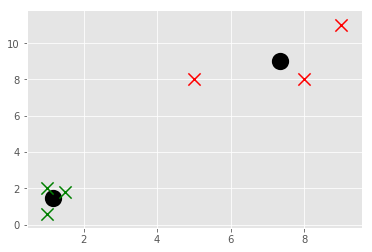

In [3]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

# Agrupar nuevos datos

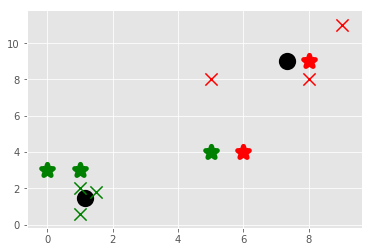

In [4]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        

unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()

# Usando la libreria KMeans de sklearn

## Calcular cuantos clusters hay

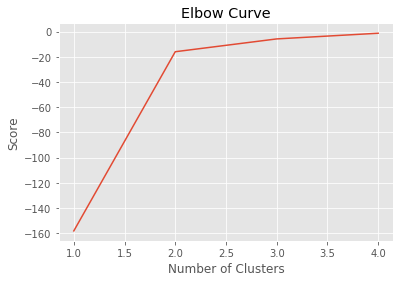

In [9]:
from sklearn.cluster import KMeans

Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

El codo está claramente en el 2, por lo tanto podemos decir que hay 2 clusters.

In [10]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 7.33333333  9.        ]
 [ 1.16666667  1.46666667]]


In [11]:
# si los comparamos con los centroides que hemos sacado nosotros antes veremos que son los mismos
clf.centroids

{0: array([ 1.16666667,  1.46666667]), 1: array([ 7.33333333,  9.        ])}